In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = [1,2,3,4,5,6]  
#y[i] is the output of y = theta0+ theta1 * x[1]  
y = [13,14,20,21,25,30]  

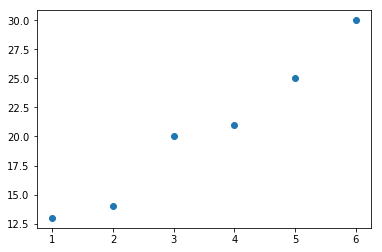

In [5]:
plt.scatter(x,y)

In [25]:
epsilon = 0.01

In [26]:
alpha = 0.01
diff = [0, 0]
max_itor = 2000
error1 = 0
error0 = 0
cnt = 0
m = len(x)

In [27]:
theta0 = 0
theta1 = 0

In [28]:
while True:
    cnt+=1
    diff=[0,0]
    for i in range(m):
        diff[0]+=theta0+theta1*x[i]-y[i]
        diff[1]+=(theta0+theta1*x[i]-y[i])*x[i]
    theta0-=alpha*diff[0]/m
    theta1-=alpha*diff[1]/m
    error1=0
    for i in range(m):
        error1+=(theta0+theta1*x[i]-y[i])**2
    if abs(error1-error0)<epsilon:
        break
    print('theta0 :%f,theta1 :%f,error:%f'%(theta0,theta1,error1))
    if cnt>20:
        print('cnt>20')
        break
print('theta0 :%f,theta1 :%f,error:%f'%(theta0,theta1,error1))

theta0 :0.205000,theta1 :0.816667,error:1948.212261
theta0 :0.379367,theta1 :1.502297,error:1395.602361
theta0 :0.527993,theta1 :2.077838,error:1005.467313
theta0 :0.654988,theta1 :2.560886,error:730.017909
theta0 :0.763807,theta1 :2.966227,error:535.521394
theta0 :0.857351,theta1 :3.306283,error:398.166976
theta0 :0.938058,theta1 :3.591489,error:301.147437
theta0 :1.007975,theta1 :3.830615,error:232.599138
theta0 :1.068824,theta1 :4.031026,error:184.147948
theta0 :1.122050,theta1 :4.198911,error:149.882851
theta0 :1.168868,theta1 :4.339471,error:125.631467
theta0 :1.210297,theta1 :4.457074,error:108.448654
theta0 :1.247197,theta1 :4.555391,error:96.255537
theta0 :1.280286,theta1 :4.637505,error:87.584709
theta0 :1.310171,theta1 :4.706007,error:81.400378
theta0 :1.337359,theta1 :4.763073,error:76.971413
theta0 :1.362278,theta1 :4.810533,error:73.781731
theta0 :1.385286,theta1 :4.849922,error:71.467048
theta0 :1.406686,theta1 :4.882532,error:69.770228
theta0 :1.426731,theta1 :4.909448,e

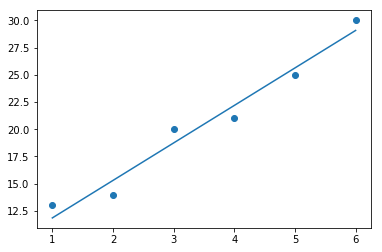

In [20]:
plt.scatter(x,y)
plt.plot(x,[theta0+theta1*i for i in x])

In [93]:
def gd(x,y,total,alpha=0.01,theta0=0,theta1=0):
    epsilon=0.01
    m=len(x)
    cnt=0
    while True:
        cnt+=1
        diff=[0,0]
        for i in range(m):
            diff[0]+=theta0+theta1*x[i]-y[i]
            diff[1]+=(theta0+theta1*x[i]-y[i])*x[i]
        theta0-=alpha*diff[0]/m
        theta1-=alpha*diff[1]/m
        error1=0
        for i in range(m):
            error1+=(theta0+theta1*x[i]-y[i])**2/(2*m)
        if abs(error1)<epsilon:
            break
        print('theta0 :%f,theta1 :%f,error:%f'%(theta0,theta1,error1))
        if cnt>total:
            print('cnt>%s'% total)
            break
    print('theta0 :%f,theta1 :%f,error:%f'%(theta0,theta1,error1))
    plt.scatter(x,y)
    plt.plot(x,[theta0+theta1*i for i in x])

In [67]:
np.random.seed(12)
x = np.arange(-2,2,0.05)
y = 2*x+np.random.random(len(x))

In [68]:
x = x.reshape((len(x),1))
y = y.reshape((len(x),1))

theta0 :0.004324,theta1 :0.026460,error:434.040144
theta0 :0.008611,theta1 :0.052569,error:422.913412
theta0 :0.012862,theta1 :0.078330,error:412.077813
theta0 :0.017077,theta1 :0.103749,error:401.525704
theta0 :0.021256,theta1 :0.128829,error:391.249643
theta0 :0.025399,theta1 :0.153577,error:381.242383
theta0 :0.029508,theta1 :0.177995,error:371.496868
theta0 :0.033581,theta1 :0.202089,error:362.006230
theta0 :0.037620,theta1 :0.225862,error:352.763778
theta0 :0.041624,theta1 :0.249319,error:343.762999
theta0 :0.045594,theta1 :0.272465,error:334.997552
theta0 :0.049530,theta1 :0.295302,error:326.461262
theta0 :0.053432,theta1 :0.317836,error:318.148117
theta0 :0.057301,theta1 :0.340071,error:310.052261
theta0 :0.061137,theta1 :0.362010,error:302.167996
theta0 :0.064940,theta1 :0.383657,error:294.489771
theta0 :0.068710,theta1 :0.405016,error:287.012181
theta0 :0.072449,theta1 :0.426092,error:279.729965
theta0 :0.076154,theta1 :0.446887,error:272.637998
theta0 :0.079828,theta1 :0.4674

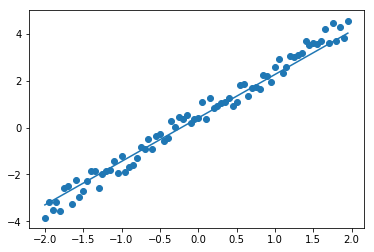

In [80]:
gd(x,y,200)

In [83]:
def gd_stochastic(x,y,total,alpha=0.001,theta0=0,theta1=0):
    epsilon=1
    m=len(x)
    cnt=0
    err=[]
    while True:
        cnt+=1
        diff=[0,0]
        for i in range(m):
            diff[0]+=(theta0+theta1*x[i]-y[i])*(alpha+1/(i+1))
            diff[1]+=(theta0+theta1*x[i]-y[i])*x[i]*(alpha+1/(i+1))
        theta0-=diff[0]/m
        theta1-=diff[1]/m
        error1=0
        for i in range(m):
            error1+=(theta0+theta1*x[i]-y[i])**2
        if abs(error1)<epsilon:
            break
        err.append(error1)
        print('theta0 :%f,theta1 :%f,error:%f'%(theta0,theta1,error1))
        if cnt>total:
            print('cnt>%s'% total)
            break
    print('theta0 :%f,theta1 :%f,error:%f'%(theta0,theta1,error1))
    f,ax=plt.subplots(1,2)
    ax[0].scatter(x,y)
    ax[0].plot(x,[theta0+theta1*i for i in x])
    ax[1].plot(list(range(total+1)),err)

theta0 :-0.127033,theta1 :0.285569,error:343.491936
theta0 :-0.223989,theta1 :0.516081,error:275.366087
theta0 :-0.297020,theta1 :0.702583,error:229.127846
theta0 :-0.351035,theta1 :0.853895,error:197.098591
theta0 :-0.389952,theta1 :0.977062,error:174.340830
theta0 :-0.416898,theta1 :1.077709,error:157.673437
theta0 :-0.434369,theta1 :1.160328,error:145.041901
theta0 :-0.444353,theta1 :1.228509,error:135.115330
theta0 :-0.448440,theta1 :1.285117,error:127.028350
theta0 :-0.447896,theta1 :1.332440,error:120.215644
theta0 :-0.443729,theta1 :1.372309,error:114.305756
theta0 :-0.436744,theta1 :1.406183,error:109.052832
theta0 :-0.427583,theta1 :1.435230,error:104.292675
theta0 :-0.416755,theta1 :1.460383,error:99.914388
theta0 :-0.404667,theta1 :1.482388,error:95.842037
theta0 :-0.391641,theta1 :1.501841,error:92.022760
theta0 :-0.377933,theta1 :1.519218,error:88.419019
theta0 :-0.363747,theta1 :1.534902,error:85.003547
theta0 :-0.349245,theta1 :1.549197,error:81.756019
theta0 :-0.334552,

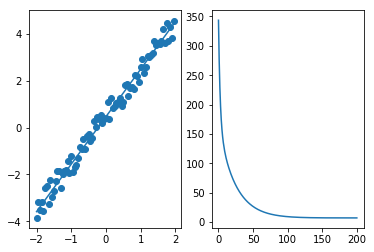

In [30]:
%time gd_stochastic(x,y,200)

In [95]:
def normaleq(x,y):
    XX=np.mat(x)
    one=np.ones((len(x),1))
    X=np.column_stack((one,XX))
    Y=np.mat(y)
    theta=np.dot((np.dot(X.T,X)).I,np.dot(X.T,Y))
    err=np.dot((np.dot(X,theta)-Y).T,np.dot(X,theta)-Y)
    print('theta0: %f \ntheta1: %f \nerror: %f'%(theta[0],theta[1],err))
    plt.scatter(x,y)
    plt.plot(x,[theta[0,0]+theta[1,0]*i for i in x])

theta0: 0.482211 
theta1: 1.992938 
error: 6.916445


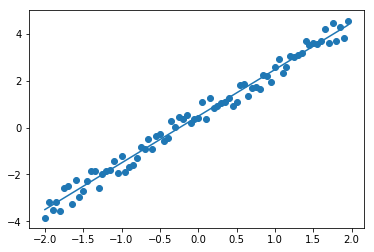

In [17]:
theta=normaleq(x,y)

In [18]:
def testsum(x,y):
    a=0
    for i in range(len(y)):
        a+=x[i]*y[i]
    return a

In [15]:
%timeit x.T.dot(y)

The slowest run took 106.67 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.35 µs per loop


In [20]:
%timeit testsum(x,y)

10000 loops, best of 3: 151 µs per loop


In [69]:
gd_stochastic(x,y,200)

theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.211682,error:445.465859
theta0 :0.034591,theta1 :0.2116

In [7]:
cd C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex1\ex1

C:\Users\诚明\Desktop\MachineLearning\machine-learning-ex1\ex1


# Multi-Linear Regression

In [58]:
cols=np.loadtxt('ex1data1.txt',delimiter=',',unpack=True,usecols=(0,1))

In [59]:
cols.shape

(2, 97)

In [60]:
X=np.transpose(cols[:-1])

In [61]:
y = np.transpose(np.array(cols[-1:]))

In [62]:
m=y.size

In [63]:
X=np.insert(X,0,1,axis=1)

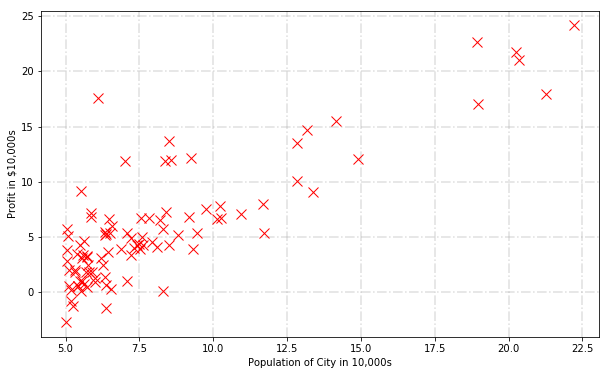

In [272]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],"rx",markersize=10)
plt.grid(True,alpha=0.3,linestyle='-.',linewidth=2)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [19]:
iterations = 1500
alpha = 0.01

In [20]:
def h(theta,X):                    # hypothesis function
    return np.dot(X,theta)

In [21]:
def computeCost(mytheta,X,y):
    return float(1/(2*m)*np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

In [22]:
initial_theta = np.zeros((X.shape[1],1))

In [23]:
computeCost(initial_theta,X,y)

0.5

In [24]:
def descendGradient(X, theta_start = np.zeros(2)):
    theta=theta_start
    jvec=[]
    for _ in range(iterations):
        delta=1/m*X.T.dot(h(theta,X)-y)
        theta=theta-alpha*delta
        jvec.append(computeCost(theta,X,y))
    return theta,jvec

In [25]:
theta,jvec=descendGradient(X,initial_theta)

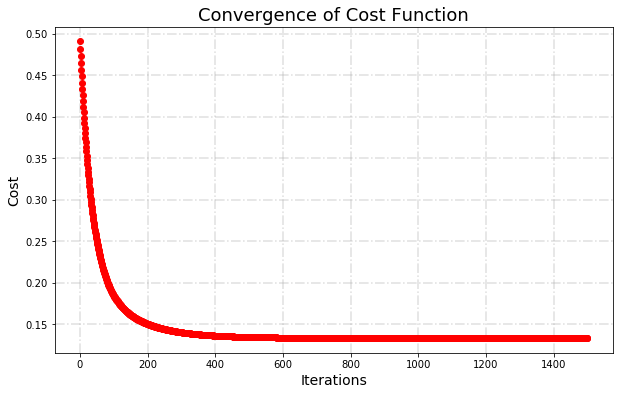

In [26]:
plt.figure(figsize=(10,6))
plt.plot(list(range(len(jvec))),jvec,'bo',color='r')
plt.grid(True,alpha=0.3,linestyle='-.',linewidth=2)
plt.title('Convergence of Cost Function',fontsize=18)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Cost',fontsize=14)

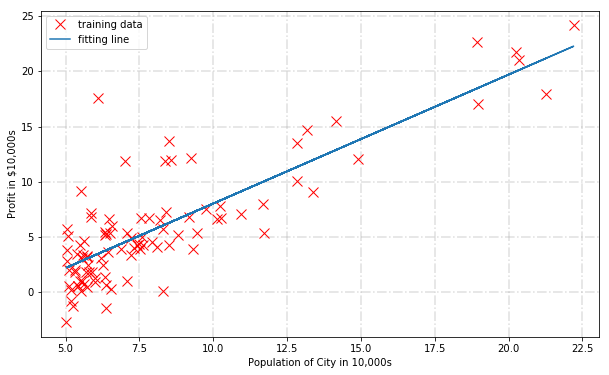

In [334]:
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],"rx",markersize=10,label="training data")
plt.plot(X[:,1],X.dot(theta),label='fitting line')
plt.grid(True,alpha=0.3,linestyle='-.',linewidth=2)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

In [72]:
cols1=np.loadtxt('ex1data2.txt',delimiter=',',usecols=(0,1,2),unpack=True)

In [73]:
cols1.shape

(3, 47)

In [74]:
X=np.transpose(cols1[:-1])
y=np.transpose(cols1[-1:])
m=y.size

In [75]:
X=np.insert(X,0,1,axis=1)

In [77]:
X.shape

(47, 3)

In [31]:
meanvalue=np.mean(X,axis=0)[1:]
stdvalue=np.std(X,axis=0)[1:]

In [32]:
X[:,1:]=(X[:,1:]-meanvalue)/stdvalue

In [14]:
y=(y-np.mean(y))/np.std(y)

In [33]:
initial_theta = np.zeros((X.shape[1],1))
theta, jvec = descendGradient(X,initial_theta)

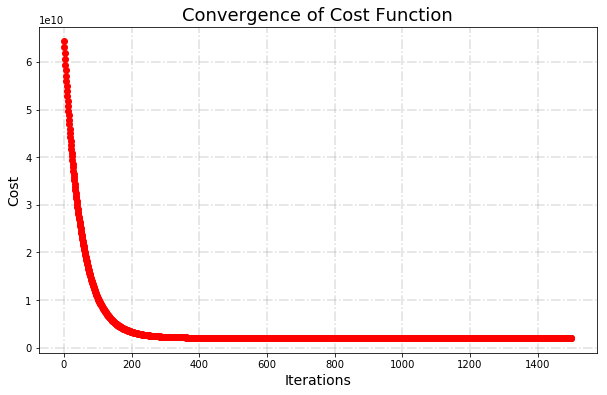

In [34]:
plt.figure(figsize=(10,6))
plt.plot(list(range(len(jvec))),jvec,'bo',color='r')
plt.grid(True,alpha=0.3,linestyle='-.',linewidth=2)
plt.title('Convergence of Cost Function',fontsize=18)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('Cost',fontsize=14)

In [38]:
test=np.array([1650,3])
test1=(test-meanvalue)/stdvalue

In [41]:
test1=np.insert(test1,0,1)

In [43]:
np.dot(test1,theta)

array([ 293098.46667577])

In [78]:
def preprocess(url):
    cols=np.loadtxt(url,delimiter=',',unpack=True)
    X=np.transpose(cols[:-1])
    X=np.insert(X,0,1,axis=1)
    if X.shape[1]>2:
        meanvalue=np.mean(X,axis=0)[1:]
        stdvalue=np.std(X,axis=0)[1:]
        X[:,1:]=(X[:,1:]-meanvalue)/stdvalue
    y=np.transpose(cols[-1:])
    theta=np.zeros((X.shape[1],1))
    m=y.size
    return X,y,theta,m

def Jfunc(url,theta):
    X,y,_,m=preprocess(url)
    return float(1/(2*m)*np.dot((X.dot(theta)-y).T,(X.dot(theta)-y)))
                 
def costfunc(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(list(range(len(jvec))),jvec,'bo',color='r')
    plt.grid(True,alpha=0.3,linestyle='-.',linewidth=2)
    plt.title('Convergence of Cost Function',fontsize=18)
    plt.xlabel('Iterations',fontsize=14)
    plt.ylabel('Cost',fontsize=14)

def gradientdescent(url,iterations,alpha=0.01):
    X,y,theta,m=preprocess(url)
    jvec=[]
    for _ in range(iterations):
        delta=1/m*X.T.dot((np.dot(X,theta)-y))
        theta=theta-alpha*delta
        jvec.append(Jfunc(url,theta))
    costfunc(jvec)
    return theta

array([[ 340412.56301439],
       [ 109370.05670466],
       [  -6500.61509507]])

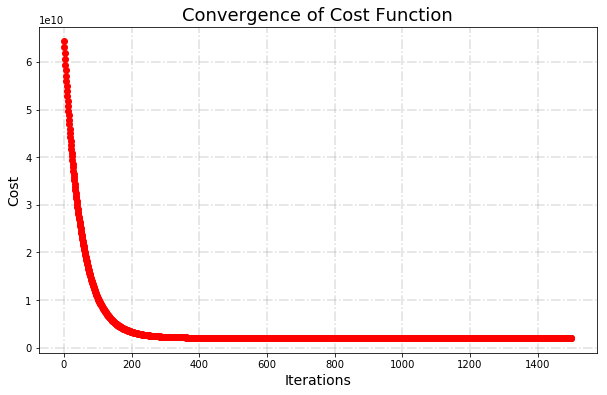

In [80]:
gradientdescent('ex1data2.txt',1500)

In [64]:
def Jfunc(url):
    X,y,theta,m=preprocess(url)
    return float(1/(2*m)*np.dot((X.dot(theta)-y).T,(X.dot(theta)-y)))

In [65]:
Jfunc('ex1data1.txt')

32.072733877455676

In [67]:
theta=np.array([[0],[0]])
computeCost(theta,X,y)

32.072733877455676